# Imports

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [18]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None


In [19]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      1,
      -1,
      -1
],dtype=ctypes.c_float)

print(len(X[0]))

2


In [20]:
X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y_plot = np.array([
      1,
      -1,
      -1
])

In [21]:
layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 1.]


In [22]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))
print(w_array)

[ 0.80125093  0.9189024  -0.6711223 ]


In [23]:
X_flat = X.flatten()

In [24]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [25]:
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

In [26]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
      w_array_ptr,
      y_to_predict_ptr,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      1, # number of classes to predict
      0.1, # learning rate
      100000, # epochs
      layers_ptr_pmc, # pointeur vers la forme de pmc
      number_of_layers, # number of layers
      True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr,(3,))
print(pmc_trained_model)

[ 5.9155316  -0.06753369 -2.9966667 ]


In [27]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)

In [28]:
X_to_predict = []

for i in range(10000) :
    x_1 = random.random()*2 + 1
    x_2 = random.random()*2 + 1
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [29]:
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    True, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr,(1*len(X_to_predict),))
print(pmc_predict_model)

[-0.7967586   0.9706338   0.5757709  ...  0.41325313 -0.9537302
 -0.9848526 ]


In [30]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

In [ ]:
# predicted_labels = []
# predicted_x_1 = []
# predicted_x_2 = []
#
# for x1 in range(100* min(X_to_predict[:, 0]), 100* max(X_to_predict[:, 0])):
#     for x2 in range(100* min(X_to_predict[:, 1]), 100* max(X_to_predict[:, 1])):
#         predicted_x_1.append(x1/100)
#         predicted_x_2.append(x2/100)
#
# for y in pmc_predict_model :
#     if y < 0 :
#         predicted_labels.append('cyan')
#     else :
#         predicted_labels.append('purple')

In [56]:
# predicted_labels_full = []
# predicted_x1 = []
# predicted_x2 = []
# for x1 in range(100* min(X_plot[:, 0]),100* max(X_plot[:, 0])) :
#   for x2 in range(100*min(X_plot[:, 1]), 100*max(X_plot[:, 1])) :
#     predicted_x1.append(x1/100)
#     predicted_x2.append(x2/100)
#     predicted_labels_full.append('yellow' if x1/100 * pmc_trained_model[1] + x2/100 * pmc_trained_model[2] + pmc_trained_model[0] >= 0 else 'lightskyblue')

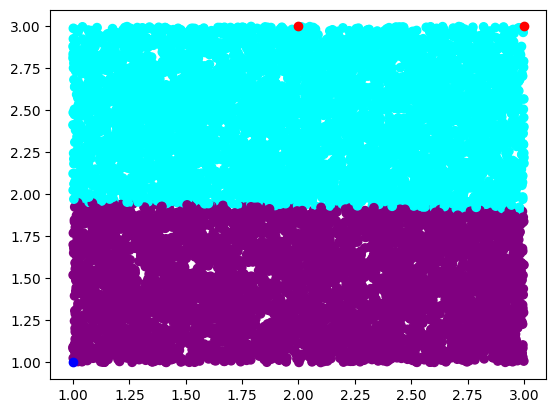

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
#plt.scatter(predicted_x1, predicted_x2, c=predicted_labels_full)

plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

In [3]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 1.]


In [5]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0],dtype=ctypes.c_float)

In [6]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))
print(w_array)
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[-0.10926366 -0.8475838   0.13202429]


In [11]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.01,  # learning rate
    100000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3,))
print(pmc_trained_model)


[20.919575 -4.801812 -5.854746]


In [13]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(10000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(1.0, 3.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(1.0, 3.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
# print(pmc_predict_model)

In [14]:
print(len(X_to_predict_flat))

20000


In [15]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

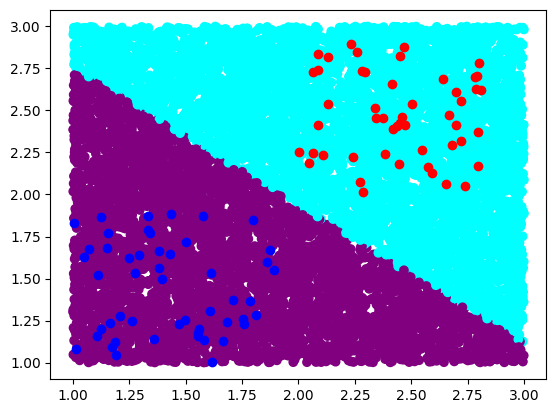

<Figure size 640x480 with 0 Axes>

In [16]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 2. 1.]


In [4]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]],dtype=ctypes.c_float)
Y = np.array([1, 1, -1, -1],dtype=ctypes.c_float)

In [5]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))
print(w_array)
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[-0.8000977   0.48381305 -0.35771966  0.01463127  0.5331843   0.40994477
  0.6931932  -0.6632147   0.79384327]


In [6]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.1,  # learning rate
    10000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))
print(pmc_trained_model)


[-0.8000977   0.48381305 -0.35771966  0.01463127  0.5331843   0.40994477
  2.8741589   2.3516338  -2.6742463 ]


In [10]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(0.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(0.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
# print(pmc_predict_model)

In [11]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

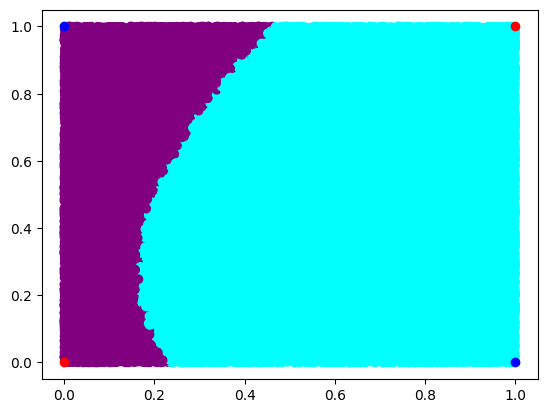

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [8]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

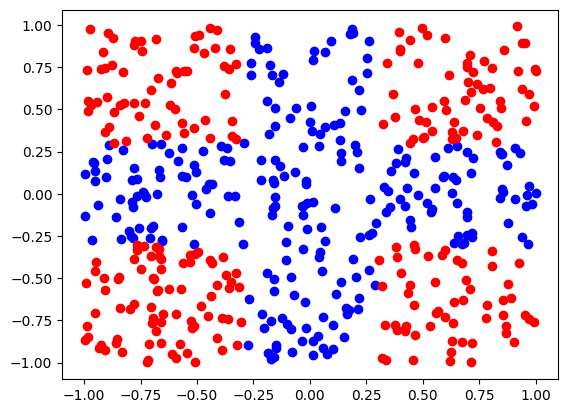

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 3], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 3.]


In [3]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

X=np.array(X,dtype=ctypes.c_float)
Y=np.array(Y,dtype=ctypes.c_float)

In [4]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))
print(w_array)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

[ 0.6903274  -0.24150419  0.9703207   0.13593698 -0.7702501   0.7925179
  0.54623103  0.40421677  0.00516391]


In [28]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    3,  # number of classes to predict
    0.1,  # learning rate
    100000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))
print(pmc_trained_model)

[ 0.19524947  0.65399355  0.32289657 -0.37134904  0.09796482  0.34780625
 -0.28747612  1.2087823  -0.4884367 ]


In [29]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)
pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    3,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (3 * len(X_to_predict),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))
# print(pmc_predict_model)

In [30]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for j in range(0,len(pmc_predict_model)-2,3) :
    if pmc_predict_model[j] > pmc_predict_model[j+1] and pmc_predict_model[j] > pmc_predict_model[j+2] :
        predicted_labels.append('cyan')
    elif pmc_predict_model[j+1] > pmc_predict_model[j] and pmc_predict_model[j+1] > pmc_predict_model[j+2] :
        predicted_labels.append('purple')
    elif pmc_predict_model[j+2] > pmc_predict_model[j] and pmc_predict_model[j+2] > pmc_predict_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

In [23]:
print(predicted_x_1)
print(predicted_x_2)
print(predicted_labels)
print(len(pmc_predict_model)-3)

[0.9838567, -0.17872545, 0.50701505, -0.22765185, 0.682325, -0.87683964, 0.25692835, -0.093937285, 0.31587246, -0.9012384, 0.9140817, -0.35154936, -0.7741105, -0.32829237, -0.08214679, -0.6658426, 0.2521802, -0.1811085, -0.5092578, -0.99487436, -0.27714184, -0.7271003, 0.3504467, -0.42818522, 0.39595166, 0.07838794, -0.8649157, 0.8470255, 0.8885515, -0.20971654, 0.5769346, -0.5611126, -0.51758075, 0.4788618, 0.13226174, 0.4165922, -0.93729645, 0.041643858, 0.84840536, 0.21381056, -0.9404181, -0.073557325, -0.3373145, -0.20214523, -0.53859985, 0.6550801, -0.6816341, -0.2770142, -0.6189947, -0.63300985, 0.28351918, -0.43087113, -0.77271485, -0.69855434, -0.16172312, -0.22508533, 0.24947649, 0.8049657, -0.8044259, 0.8862056, -0.67895275, -0.8632062, 0.96198803, 0.87022126, 0.8809637, -0.3132823, 0.5393253, -0.7172744, -0.6113901, 0.56064516, 0.027517729, 0.27540597, -0.6295047, -0.11771735, -0.37731376, -0.9120508, 0.041259676, 0.7678699, 0.43424845, -0.6877826, -0.9506474, 0.07507735, 0.

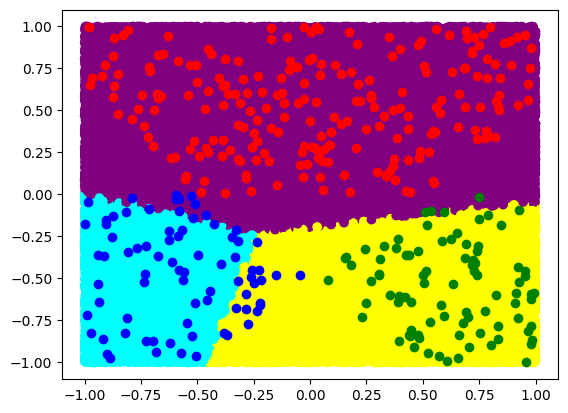

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [11]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

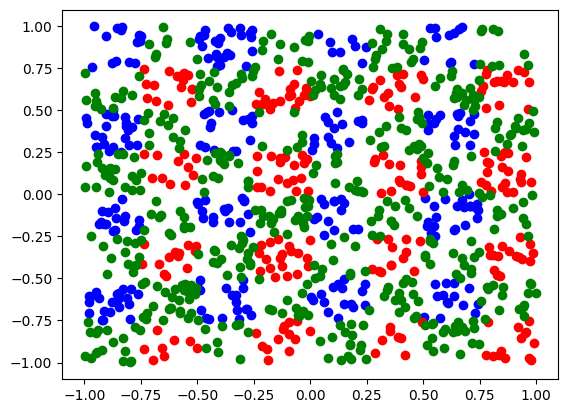

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

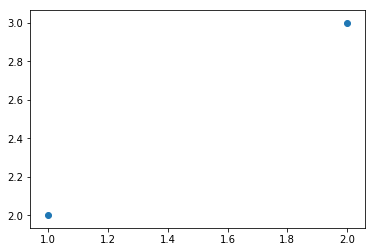

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

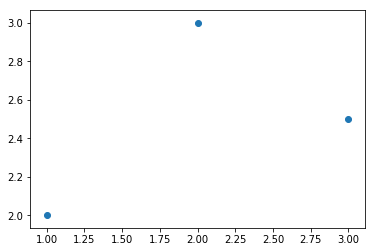

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [17]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [24]:
print(X[:,0])
print(X[:,1])

[1 2 3]
[1 2 1]


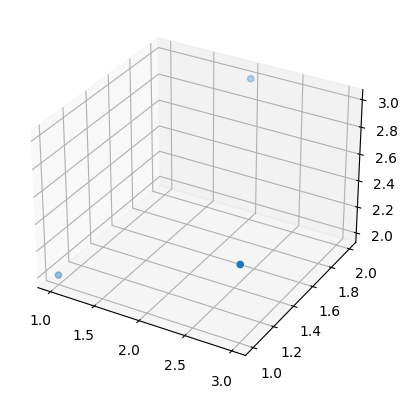

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
# plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [5]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [7]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>